### Import Libraries and Data

In [3]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels
import statsmodels.api as sm

In [5]:
df = pd.read_csv('C:/Users/azkaw/OneDrive/Documents/College/Infrastruktur dan Platform untuk Sains Data/Modul 4/spotify.csv')
df.head()

,title,artist,top genre,year,bpm,energy,danceability,live,valence,duration,acousticness,speechiness,popularity
0,Just the Way You Are,Bruno Mars,dance pop,2010,109,84,64,6,42,221,1,4,85
1,"Hey, Soul Sister",Train,dance pop,2010,97,89,67,8,80,217,19,4,85
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,52,64,263,24,23,84
3,TiK ToK,Kesha,dance pop,2010,120,84,76,29,71,200,10,14,84
4,Only Girl (In The World),Rihanna,barbadian pop,2010,126,71,79,6,64,235,11,4,83


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         999 non-null    object
 1   artist        999 non-null    object
 2   top genre     999 non-null    object
 3   year          999 non-null    int64 
 4   bpm           999 non-null    int64 
 5   energy        999 non-null    int64 
 6   danceability  999 non-null    int64 
 7   live          999 non-null    int64 
 8   valence       999 non-null    int64 
 9   duration      999 non-null    int64 
 10  acousticness  999 non-null    int64 
 11  speechiness   999 non-null    int64 
 12  popularity    999 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 101.6+ KB


In [7]:
df.nunique()

title           893
artist          370
top genre       111
year             10
bpm             121
energy           77
danceability     71
live             69
valence          94
duration        173
acousticness     81
speechiness      49
popularity       47
dtype: int64

In [9]:
kategorikal = df.select_dtypes(include='object').columns
kategorikal

Index(['title', 'artist', 'top genre'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in kategorikal:
  df[i] = le.fit_transform(df[i])

### Exploratory Data Analysis (EDA) & Data Preprocessing

#### Data Type

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
title,999.0,444.578579,257.214113,0.0,222.5,441.0,667.0,892.0
artist,999.0,182.854855,104.655375,0.0,93.0,178.0,276.5,369.0
top genre,999.0,53.477477,30.564516,0.0,31.0,42.0,87.0,110.0
year,999.0,2014.502503,2.874068,2010.0,2012.0,2015.0,2017.0,2019.0
bpm,999.0,121.740741,28.152353,51.0,99.0,122.0,139.0,214.0
energy,999.0,68.152152,15.585271,6.0,58.0,70.0,80.0,97.0
danceability,999.0,66.658659,13.395353,21.0,58.0,68.0,76.0,97.0
live,999.0,17.283283,12.772749,2.0,9.0,12.0,21.0,83.0
valence,999.0,51.084084,21.649766,4.0,35.0,50.0,67.0,97.0
duration,999.0,222.079079,35.925925,81.0,200.0,220.0,239.0,484.0


#### Check Missing Value

In [12]:
df.isna().sum()

title           0
artist          0
top genre       0
year            0
bpm             0
energy          0
danceability    0
live            0
valence         0
duration        0
acousticness    0
speechiness     0
popularity      0
dtype: int64

#### Duplcate Data

In [13]:
duplicate = df[df.duplicated()]
duplicate

,title,artist,top genre,year,bpm,energy,danceability,live,valence,duration,acousticness,speechiness,popularity


In [14]:
df.shape

(999, 13)

### Asumsi Analisis Regresi

#### Uji Normalitas

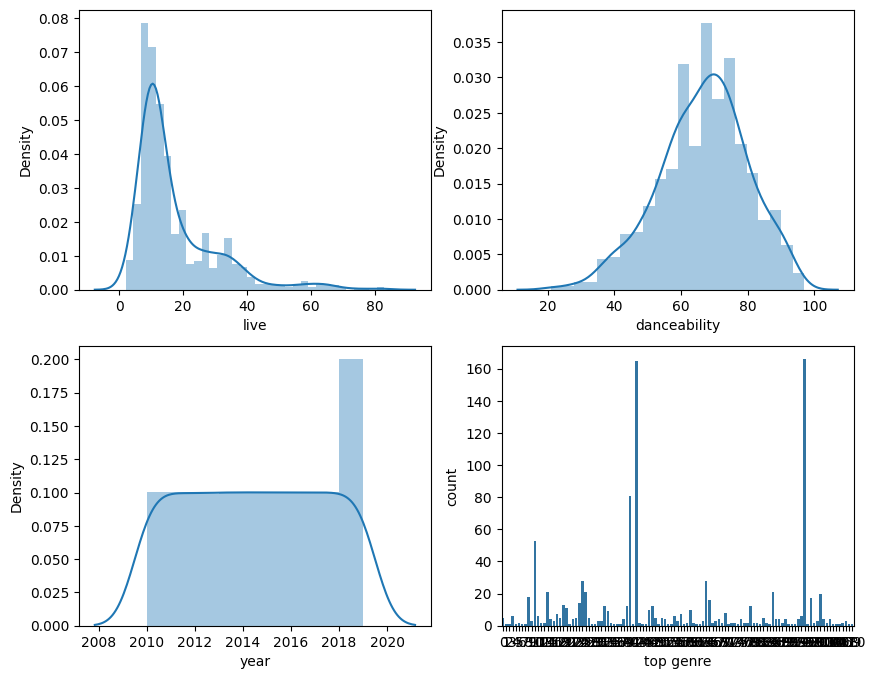

In [15]:
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.distplot(df["live"], ax=axes[0, 0])
sns.distplot(df["danceability"], ax=axes[0, 1])
sns.distplot(df["year"], ax=axes[1, 0])
sns.countplot(x="top genre", data=df, ax=axes[1, 1])
plt.show()

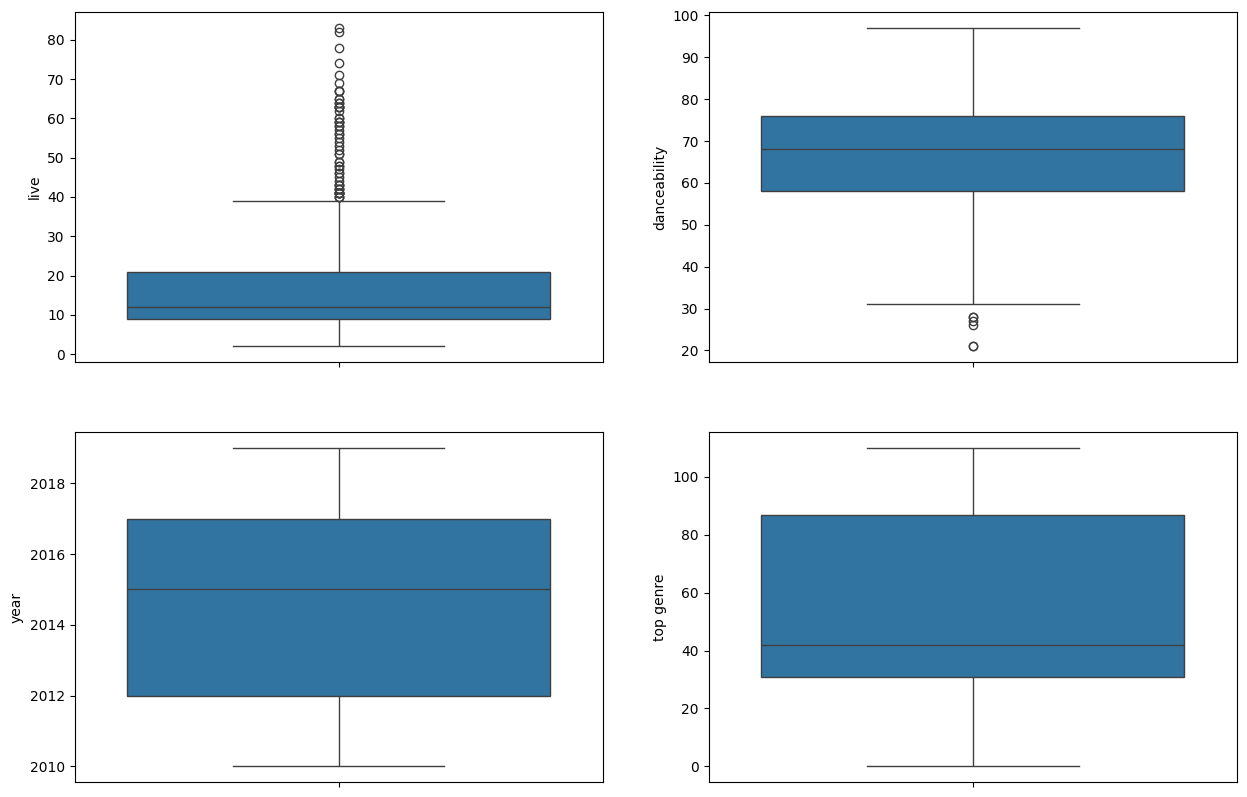

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(df["live"], ax=axes[0, 0])
sns.boxplot(df["danceability"], ax=axes[0, 1])
sns.boxplot(df["year"], ax=axes[1, 0])
sns.boxplot(df["top genre"], ax=axes[1, 1])
plt.show()

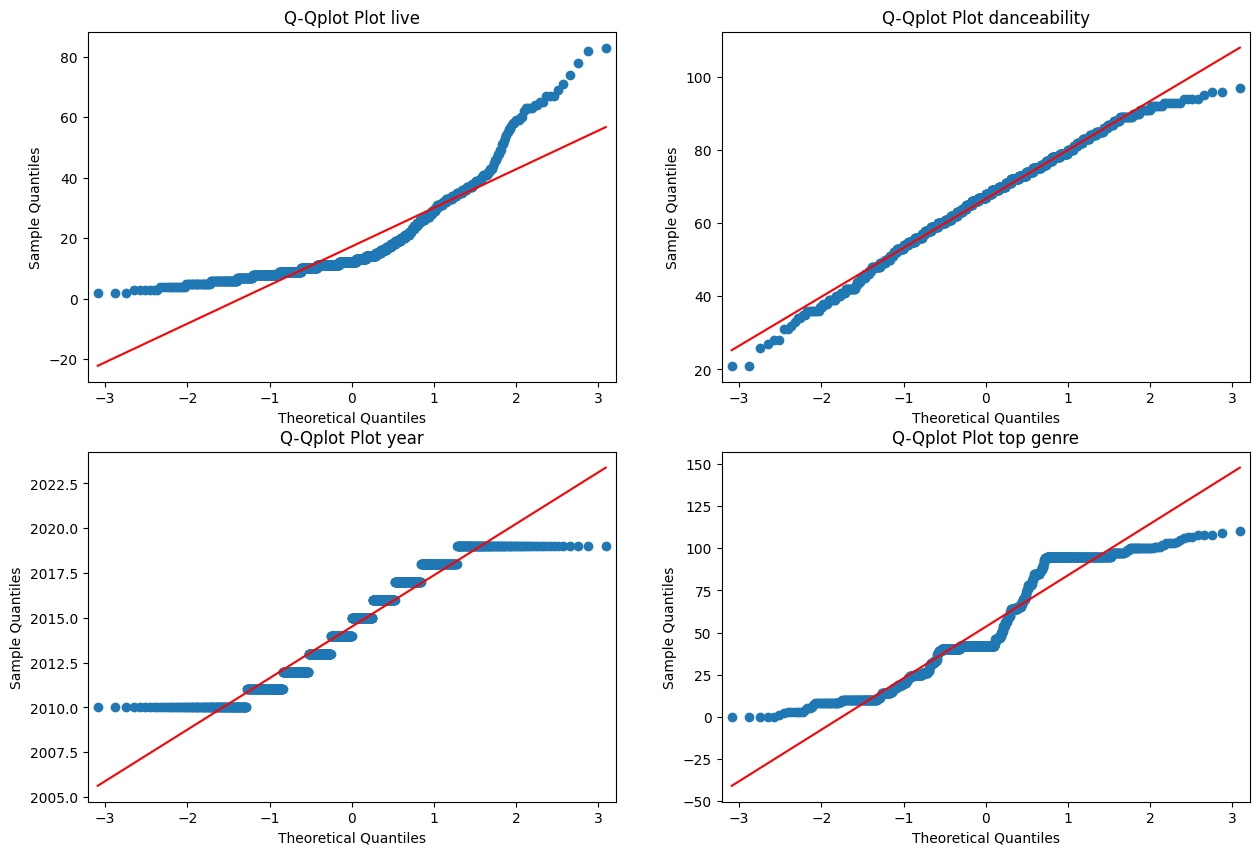

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(df["live"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot live')

sm.graphics.qqplot(df["danceability"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot danceability')

sm.graphics.qqplot(df["year"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot year')

sm.graphics.qqplot(df["top genre"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot top genre')

plt.show()

In [18]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for i in numeric_columns:
    stat, p = shapiro(df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
    else:
        print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.955, p=0.000
Tolak H0, title tidak berdistribusi normal
Statistics=0.953, p=0.000
Tolak H0, artist tidak berdistribusi normal
Statistics=0.910, p=0.000
Tolak H0, top genre tidak berdistribusi normal
Statistics=0.935, p=0.000
Tolak H0, year tidak berdistribusi normal
Statistics=0.977, p=0.000
Tolak H0, bpm tidak berdistribusi normal
Statistics=0.974, p=0.000
Tolak H0, energy tidak berdistribusi normal
Statistics=0.990, p=0.000
Tolak H0, danceability tidak berdistribusi normal
Statistics=0.785, p=0.000
Tolak H0, live tidak berdistribusi normal
Statistics=0.984, p=0.000
Tolak H0, valence tidak berdistribusi normal
Statistics=0.952, p=0.000
Tolak H0, duration tidak berdistribusi normal
Statistics=0.745, p=0.000
Tolak H0, acousticness tidak berdistribusi normal
Statistics=0.724, p=0.000
Tolak H0, speechiness tidak berdistribusi normal
Statistics=0.981, p=0.000
Tolak H0, popularity tidak berdistribusi normal


#### Uji Linearitas

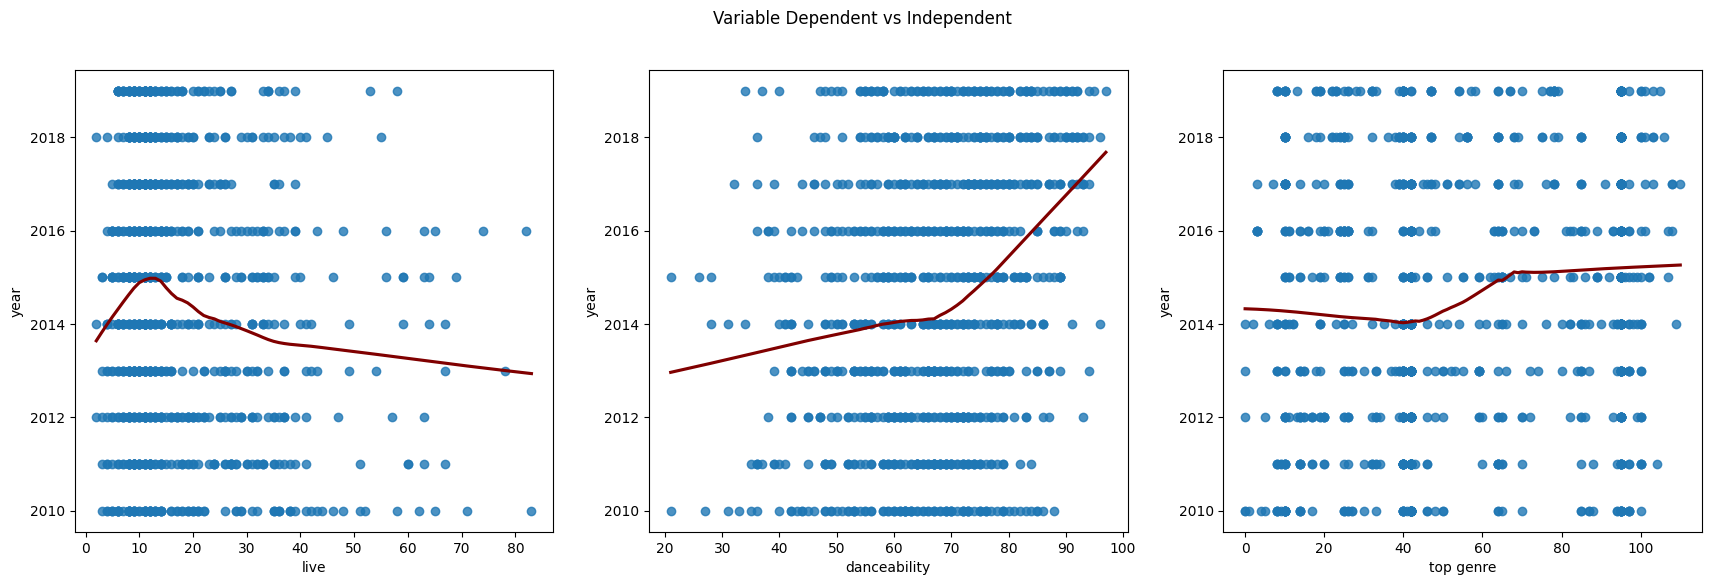

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["live"], y=df["year"], lowess=True, line_kws={'color': 'maroon'}, ax=axes[0])
sns.regplot(x=df["danceability"], y=df["year"], lowess=True, line_kws={'color': 'maroon'}, ax=axes[1])
sns.regplot(x=df["top genre"], y=df["year"], lowess=True, line_kws={'color': 'maroon'}, ax=axes[2])
plt.show()

#### Uji Multikolinearitas

<Axes: >

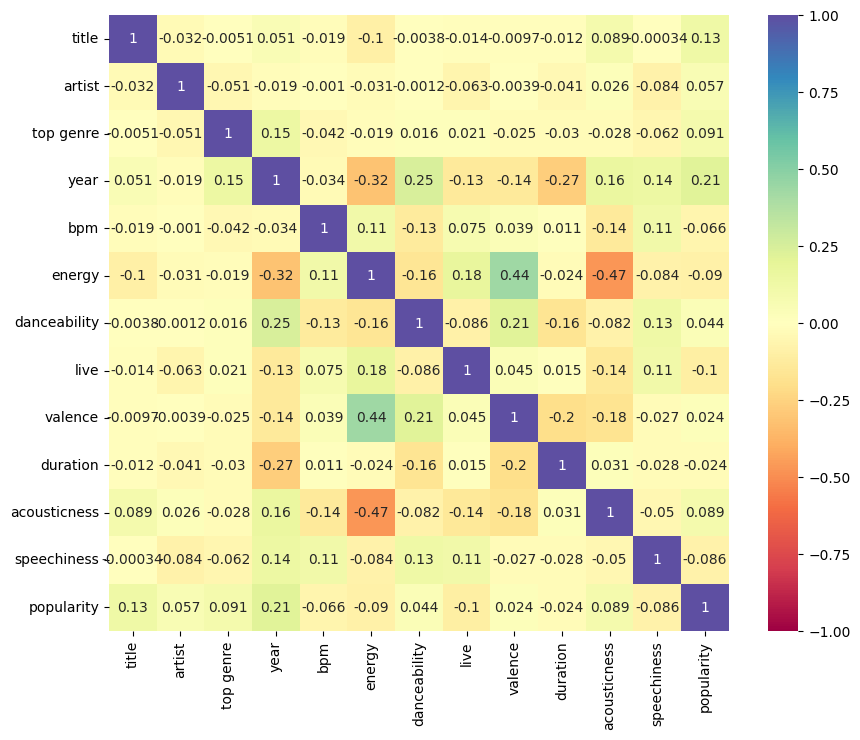

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [21]:
korelasi = df.corr()["year"].sort_values()
korelasi

energy         -0.318305
duration       -0.265633
valence        -0.138574
live           -0.134517
bpm            -0.034302
artist         -0.019059
title           0.050969
speechiness     0.144171
top genre       0.145460
acousticness    0.156421
popularity      0.211190
danceability    0.248434
year            1.000000
Name: year, dtype: float64

### Scaling

In [22]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-0.18895896, -1.28920661, -0.37570451, ..., -0.72052041,
        -0.63409603,  1.61083116],
       [-0.50013967,  1.44494108, -0.37570451, ...,  0.22741623,
        -0.63409603,  1.61083116],
       [ 0.01719826, -0.74428906, -0.24476824, ...,  0.49073197,
         1.30903873,  1.49360086],
       ...,
       [ 1.27359038,  1.07210276,  0.01710429, ...,  1.80731063,
        -0.73636628, -1.43715665],
       [-1.11861133, -0.76340897,  0.54084934, ..., -0.24655209,
        -0.42955553, -1.43715665],
       [ 1.0635434 , -0.64868949, -0.44117264, ...,  2.28127895,
        -0.63409603, -1.55438695]])

In [23]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,title,artist,top genre,year,bpm,energy,danceability,live,valence,duration,acousticness,speechiness,popularity
0,-0.188959,-1.289207,-0.375705,-1.567381,-0.452791,1.017357,-0.198576,-0.883830,-0.419803,-0.030051,-0.720520,-0.634096,1.610831
1,-0.500140,1.444941,-0.375705,-1.567381,-0.879256,1.338333,0.025495,-0.727168,1.336292,-0.141447,0.227416,-0.634096,1.610831
2,0.017198,-0.744289,-0.244768,-1.567381,-1.234644,1.595115,0.623016,2.719392,0.596883,1.139606,0.490732,1.309039,1.493601
3,1.223024,-0.055972,-0.375705,-1.567381,-0.061864,1.017357,0.697706,0.917781,0.920374,-0.614880,-0.246552,0.388606,1.493601
4,0.367277,1.014743,-1.292258,-1.567381,0.151369,0.182818,0.921777,-0.883830,0.596883,0.359835,-0.193889,-0.634096,1.376371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.211354,-1.346566,-0.997652,1.565638,-0.630485,-1.935626,1.818058,-0.492175,-0.558442,-2.592159,0.174753,1.718120,-1.202696
995,-1.593162,-0.973728,-0.441173,1.565638,-0.950334,0.632185,-0.123885,-0.257183,0.504457,-1.450350,0.438069,-0.736366,-1.319926
996,1.273590,1.072103,0.017104,1.565638,0.186908,-1.743040,0.174875,-0.805499,0.134753,-1.060464,1.807311,-0.736366,-1.437157
997,-1.118611,-0.763409,0.540849,1.565638,0.791067,0.503795,-0.721407,1.701090,-0.096312,-1.088313,-0.246552,-0.429556,-1.437157


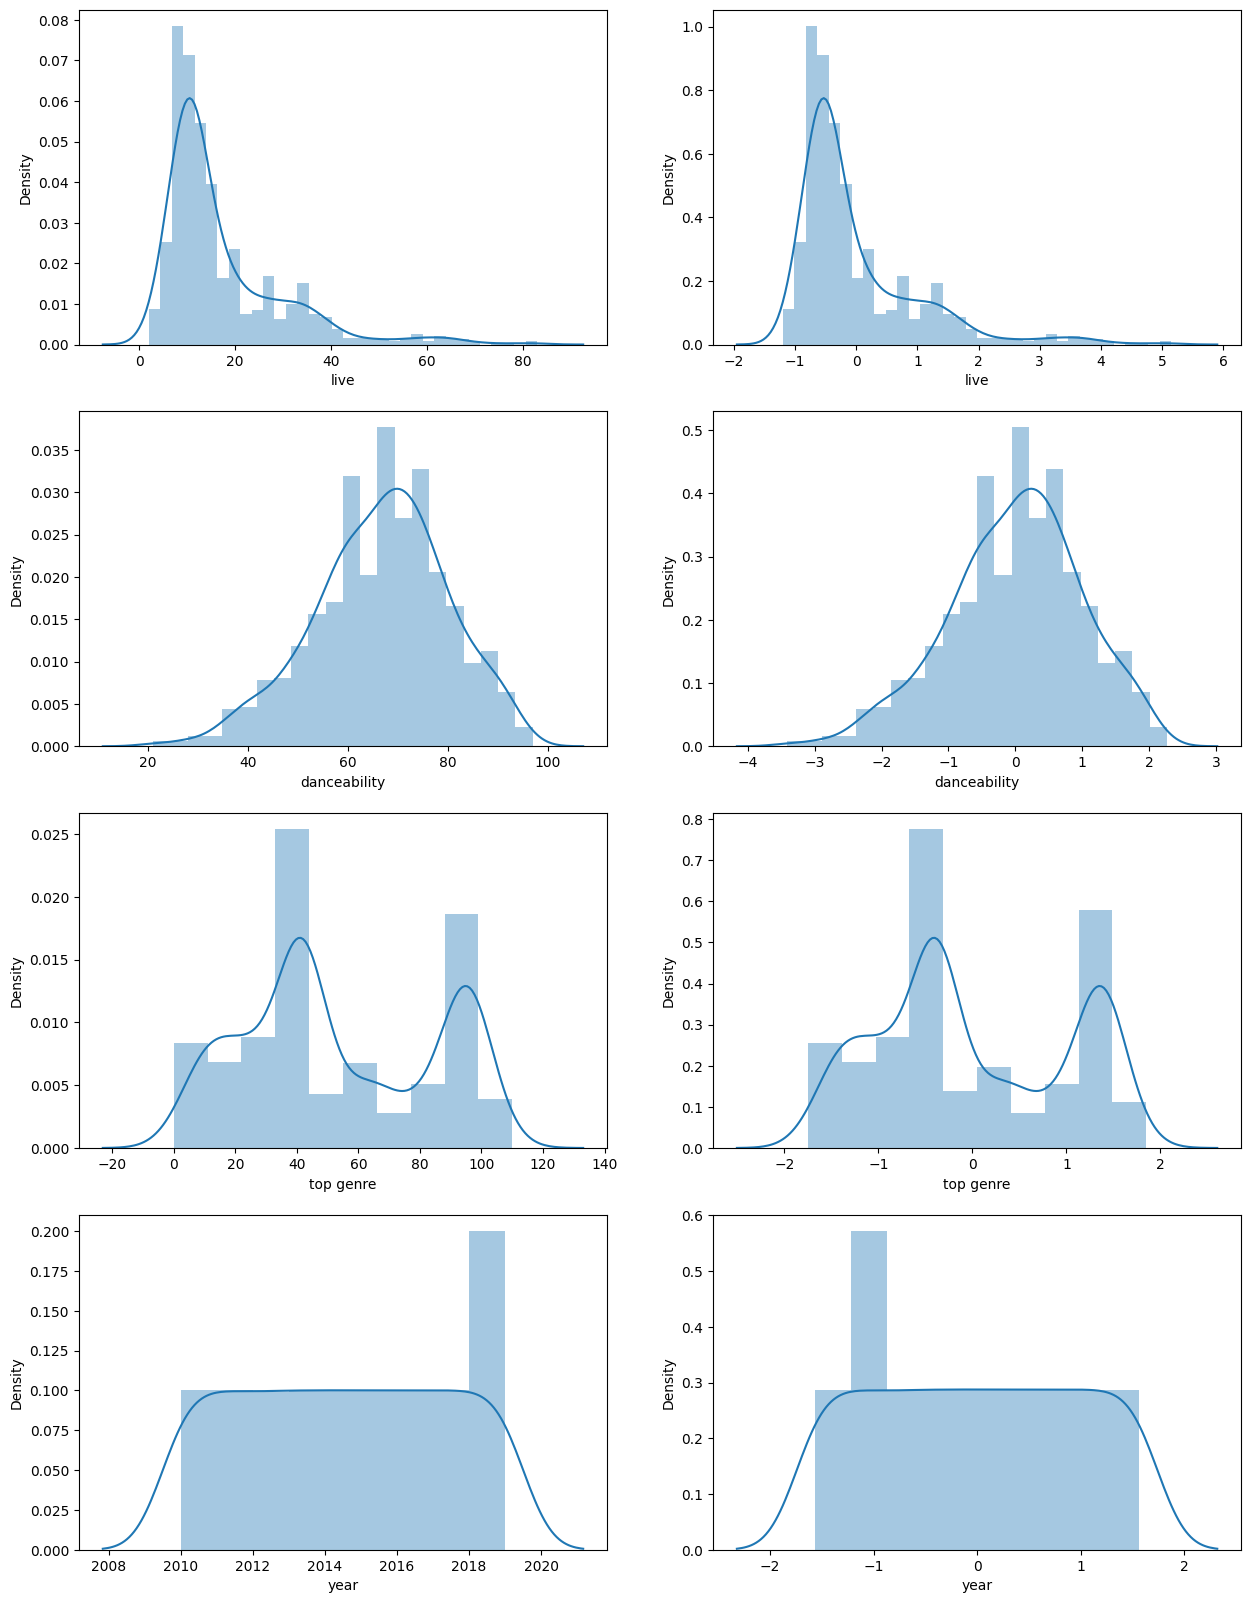

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

sns.distplot(df["live"], ax=axes[0, 0])
sns.distplot(scaled_df["live"], ax=axes[0, 1])
sns.distplot(df["danceability"], ax=axes[1, 0])
sns.distplot(scaled_df["danceability"], ax=axes[1, 1])
sns.distplot(df["top genre"], ax=axes[2, 0])
sns.distplot(scaled_df["top genre"], ax=axes[2, 1])
sns.distplot(df["year"], ax=axes[3, 0])
sns.distplot(scaled_df["year"], ax=axes[3, 1])
plt.show()

### Membangun Model Regresi

In [25]:
X = scaled_df.drop("top genre", axis=1).values
y = scaled_df["top genre"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [26]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  699
Ukuran X test  300
Ukuran y train  699
Ukuran y test  300


### Membangun model dengan package Statsmodels

In [27]:
Input = sm.add_constant(X_train)

In [28]:
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     3.444
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           6.11e-05
Time:                        21:09:53   Log-Likelihood:                -972.35
No. Observations:                 699   AIC:                             1971.
Df Residuals:                     686   BIC:                             2030.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.037     -0.042      0.9

In [30]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.056827559968040675
adjusted coefficient of determination: 0.04032891670217553
regression coefficients: [-0.00156329 -0.02129199 -0.10037081  0.16485996 -0.0097866  -0.01783207
 -0.01658051  0.04137169 -0.04758891  0.05178501 -0.07643989 -0.11896929
  0.07364375]


In [31]:
list_columns = []

for i in df.columns:
  if i != "popularity":
    list_columns.append(i)

In [32]:
list_columns

['title',
 'artist',
 'top genre',
 'year',
 'bpm',
 'energy',
 'danceability',
 'live',
 'valence',
 'duration',
 'acousticness',
 'speechiness']

In [33]:
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

if isinstance(X_test, pd.DataFrame):
    df_statsmod = X_test.copy()
else:
    df_statsmod = pd.DataFrame(X_test, columns=list_columns)

df_statsmod["actual_popularity"] = y_test
df_statsmod["prediction_popularity"] = prediction_1

print(df_statsmod.head())

      title    artist  top genre      year       bpm    energy  danceability  \
0  0.421733 -0.859009   0.869412 -0.346174 -1.422064  1.071157     -0.492175   
1  0.939071  1.225062  -1.567381 -1.341261  0.760576  0.249565     -0.962161   
2 -0.045038 -1.356126   1.217525  0.648912 -0.651720  1.892749     -0.492175   
3 -1.227525 -1.021528   0.521299 -0.097403  0.439600  0.772396     -1.040491   
4  0.740693  0.087427   1.565638 -0.914795 -1.871431 -0.646716      0.447796   

       live   valence  duration  acousticness  speechiness  actual_popularity  \
0 -0.697081  2.142170  0.596058     -0.634096     1.141910          -0.932184   
1  1.521144  0.721872  0.964700     -0.429556    -1.202696          -0.441173   
2  0.458244 -1.144011 -0.773184      2.229471    -0.382084           0.835456   
3  1.798422 -0.085749  0.016764     -0.531826     1.141910          -0.375705   
4 -0.835720 -0.169296  1.175353     -0.736366     1.259140          -1.488663   

   prediction_popularity  
0    

In [34]:
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_popilarity"] = y_test
df_statsmod["prediction_popularity"] = prediction_1
df_statsmod.head()

,title,artist,top genre,year,bpm,energy,danceability,live,valence,duration,acousticness,speechiness,actual_popilarity,prediction_popularity
0,0.421733,-0.859009,0.869412,-0.346174,-1.422064,1.071157,-0.492175,-0.697081,2.142170,0.596058,-0.634096,1.141910,-0.932184,0.467707
1,0.939071,1.225062,-1.567381,-1.341261,0.760576,0.249565,-0.962161,1.521144,0.721872,0.964700,-0.429556,-1.202696,-0.441173,-0.593513
2,-0.045038,-1.356126,1.217525,0.648912,-0.651720,1.892749,-0.492175,0.458244,-1.144011,-0.773184,2.229471,-0.382084,0.835456,-0.025566
3,-1.227525,-1.021528,0.521299,-0.097403,0.439600,0.772396,-1.040491,1.798422,-0.085749,0.016764,-0.531826,1.141910,-0.375705,0.206365
4,0.740693,0.087427,1.565638,-0.914795,-1.871431,-0.646716,0.447796,-0.835720,-0.169296,1.175353,-0.736366,1.259140,-1.488663,0.425068


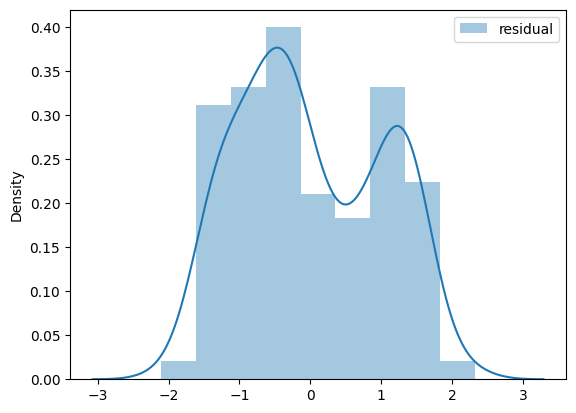

In [35]:
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_popularity"] = y_test
df_statsmod["prediction_popularity"] = prediction_1

residual1 = df_statsmod['actual_popularity'] - df_statsmod['prediction_popularity']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [36]:
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.954, p=0.000
Tolak H0, residual tidak berdistribusi normal


In [37]:
df_statsmod["residual"] = residual1
df_statsmod.head()

,title,artist,top genre,year,bpm,energy,danceability,live,valence,duration,acousticness,speechiness,actual_popularity,prediction_popularity,residual
0,0.421733,-0.859009,0.869412,-0.346174,-1.422064,1.071157,-0.492175,-0.697081,2.142170,0.596058,-0.634096,1.141910,-0.932184,0.467707,-1.399891
1,0.939071,1.225062,-1.567381,-1.341261,0.760576,0.249565,-0.962161,1.521144,0.721872,0.964700,-0.429556,-1.202696,-0.441173,-0.593513,0.152341
2,-0.045038,-1.356126,1.217525,0.648912,-0.651720,1.892749,-0.492175,0.458244,-1.144011,-0.773184,2.229471,-0.382084,0.835456,-0.025566,0.861022
3,-1.227525,-1.021528,0.521299,-0.097403,0.439600,0.772396,-1.040491,1.798422,-0.085749,0.016764,-0.531826,1.141910,-0.375705,0.206365,-0.582070
4,0.740693,0.087427,1.565638,-0.914795,-1.871431,-0.646716,0.447796,-0.835720,-0.169296,1.175353,-0.736366,1.259140,-1.488663,0.425068,-1.913731


<function matplotlib.pyplot.show(close=None, block=None)>

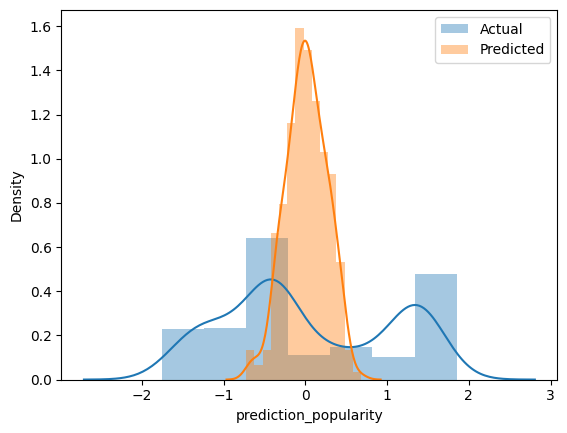

In [38]:
sns.distplot(df_statsmod['actual_popularity'], label="Actual")
sns.distplot(df_statsmod['prediction_popularity'], label="Predicted")
plt.legend()
plt.show

### Asumsi autokorelasi

In [38]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

1.923491752278343

Uji Homoskedasitas

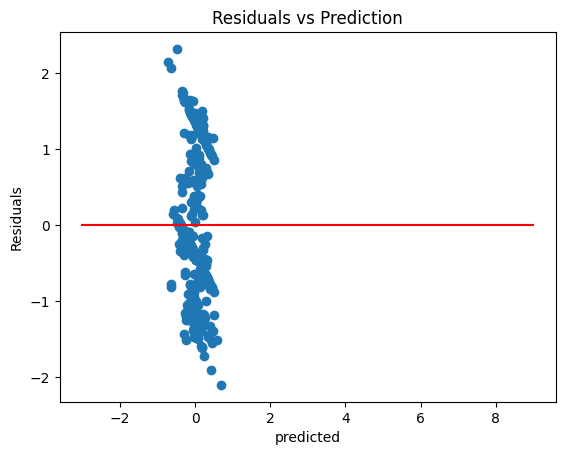

In [39]:
asm_homosk = plt.scatter(df_statsmod['prediction_popularity'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
sns.lineplot(x=[-3, 9], y=[0, 0], color='red')
plt.title('Residuals vs Prediction')
plt.show()

### Evaluation Model

In [40]:
print('R-square :', metrics.r2_score(df_statsmod['actual_popularity'], df_statsmod['prediction_popularity']))

R-square : -0.01929402653593293


In [41]:
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_popularity'], df_statsmod['prediction_popularity']))

MSE : 1.0123743189180852


### Uji Partial Analisis Regresi

#### Uji Parameter T-test

In [49]:
results = sm.OLS(y, X).fit()
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)

T-test score const:  -0.5830089221196374
T-test score X1:  -1.7362133585441295
T-test score X2:  4.483664446078951
T-test score X3:  -1.1655611732619189


In [54]:
results = sm.OLS(y, X).fit()
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)

P-value const:  0.5600204707160042
P-value X1:  0.08283816020812533
P-value X2:  8.197718528769591e-06
P-value X3:  0.2440735055175681


#### Uji kelayakan model F-test 

In [55]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  3.6215641399506615
P-value :  2.4951602859048017e-05
Tolak H0


Dari output di atas, diperoleh p-value kurang dari 0,05 sehingga hipotesis nol ditolak. Dapat disimpulkan bahwa model regresi yang dibangun dari ketiga variabel independen terhadap variabel dependen popularitas Spotify layak digunakan.